In [74]:
import dat
import csv
import pandas as pd
# GloVe model from https://nlp.stanford.edu/projects/glove/
model = dat.Model("../glove.840B.300d.txt", "words.txt")
datapath = '../data/'

In [75]:
#load DAT Olson's data
filename = "study2.tsv"
dat_list = []

with open(filename, "r") as file:
    reader = csv.DictReader(file, delimiter="\t")
    for row in reader:
        dat_list.append(row["dat"])
dat_list = [float(x) for x in dat_list]
print(len(dat_list))

#load DAT big data file
global_crea = pd.read_csv('./global-creativity.csv')
DAT_bigdata = global_crea['score']

8572


In [118]:

import json
import os
import pandas as pd
import fnmatch

# Define the file path where the data is located
data_path = '../samples/'

# Define a dictionary to store the results of model.dat(words)
results_dict = {'Temperature': [], 'Strategy': [], 'Score': [], 'Model': [], 'Control': []}

# Define a list of patterns to match file names with
file_patterns = ['sample_*', 'gpt4_*']

# Loop through each file in the data path
for file in os.listdir(data_path):
    
    # Check if the file matches any of the specified patterns
    if any(fnmatch.fnmatch(file, pattern) for pattern in file_patterns):
        
        # Open the file and load the JSON data
        with open(os.path.join(data_path, file), 'r') as f:
            data = json.load(f)
        
        # Loop through each key in the JSON data
        for i in data.keys():
            
            # Split the words into a list
            words = data[i].split()
            
            # Check if the length of the list is 20
            if len(words) == 20:
                # Select every other word starting from the first one
                w_idx = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
                words = [words[index] for index in w_idx]
            
            # Define the strategy based on the file name
            if 'sample_thes' in file or 'gpt4_thes' in file:
                strategy = 'Thesaurus'
            elif 'sample_oppo' in file or 'gpt4_oppo' in file:
                strategy = 'Opposition'
            elif 'sample_ety' in file or 'gpt4_ety' in file:
                strategy = 'Etymology'
            elif 'sample_rand' in file:
                strategy = 'Random'
            elif 'sample_none' in file or 'gpt4_none' in file:
                strategy = 'Original instructions'
            elif 'sample_nothing' in file or 'gpt4_nothing' in file:
                strategy = 'Control'
            
            # Define the condition based on the file name
            if 'temp1.5' in file:
                condition = 'High'
            elif 'temp0.5' in file:
                condition = 'Low'
            else:
                condition = 'None'
            
            # Define the model based on the file name
            if 'gpt4' in file:
                llm = 'GPT4'
            else:
                llm = 'GPT3'
            
            # Loop through each word in the list
            score = model.dat(words)
             
            # Append the results to the dictionary
            results_dict['Temperature'].append(condition)
            results_dict['Strategy'].append(strategy)
            results_dict['Score'].append(score)
            results_dict['Model'].append(llm)
            if strategy == 'Control':
                results_dict['Control'].append('Control')
            else:
                results_dict['Control'].append('Original instructions')

# Convert the results dictionary to a Pandas DataFrame
results_df = pd.DataFrame(results_dict)

# Print the results DataFrame
print(results_df)


Number of valid words 23
Number of valid words 25
Number of valid words 25
Number of valid words 25
Number of valid words 25
Number of valid words 25
Number of valid words 24
Number of valid words 26
Number of valid words 10
Number of valid words 10
Number of valid words 16
Number of valid words 10
Number of valid words 10
Number of valid words 10
Number of valid words 10
Number of valid words 96
Number of valid words 19
Number of valid words 10
Number of valid words 16
Number of valid words 19
Number of valid words 107
Number of valid words 79
Number of valid words 10
Number of valid words 10
Number of valid words 10
Number of valid words 19
Number of valid words 10
Number of valid words 10
Number of valid words 10
Number of valid words 18
Number of valid words 10
Number of valid words 10
Number of valid words 18
Number of valid words 10
Number of valid words 10
Number of valid words 17
Number of valid words 10
Number of valid words 10
Number of valid words 10
Number of valid words 41

In [119]:
results_df = pd.concat([results_df, pd.DataFrame({'Temperature': np.tile(None, len(DAT_bigdata)),
                                                  'Strategy': np.tile(None, len(DAT_bigdata)),
                                                  'Score': np.array(DAT_bigdata),
                                                  'Model': np.tile('Human', len(DAT_bigdata)),
                                                  'Control': np.tile(None, len(DAT_bigdata))})])

In [111]:
results_df.to_csv('concatenated_results.csv', index=False)

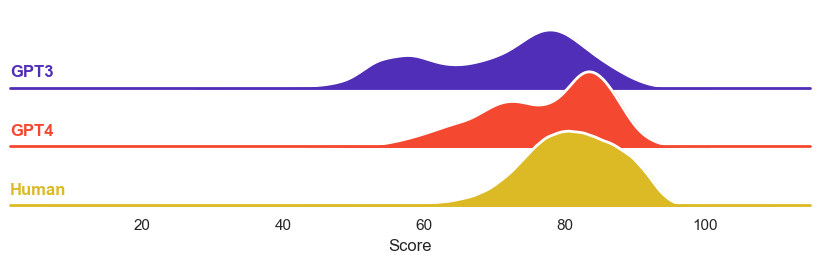

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)
g = sns.FacetGrid(results_df, row="Model", hue="Model", aspect=9, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

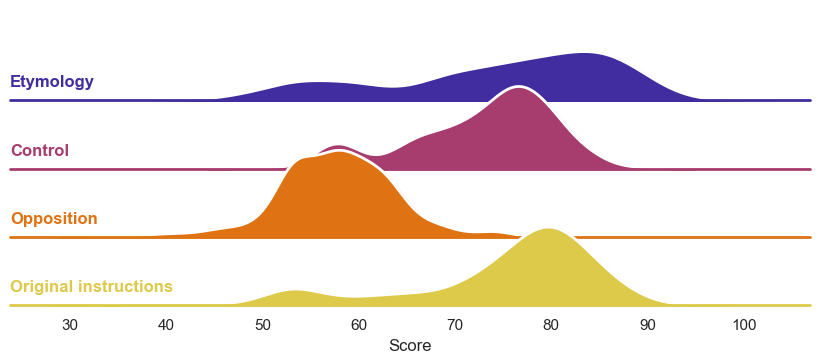

In [99]:
# Initialize the FacetGrid object
pal = sns.color_palette('CMRmap',n_colors=4, desat=.9)
g = sns.FacetGrid(results_df.loc[results_df['Model']=='GPT3'], row="Strategy", hue="Strategy", aspect=9, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

GPT4 - Strategies


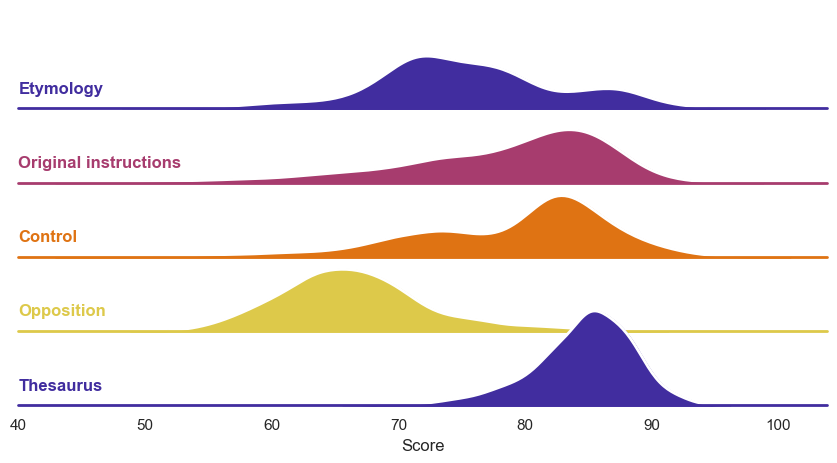

In [103]:
# Initialize the FacetGrid object
pal = sns.color_palette('CMRmap',n_colors=4, desat=.9)
g = sns.FacetGrid(results_df.loc[results_df['Model']=='GPT4'], row="Strategy", hue="Strategy", aspect=9, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
print('GPT4 - Strategies')

/home/sangfrois/anaconda3/envs/pygpt/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/sangfrois/anaconda3/envs/pygpt/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


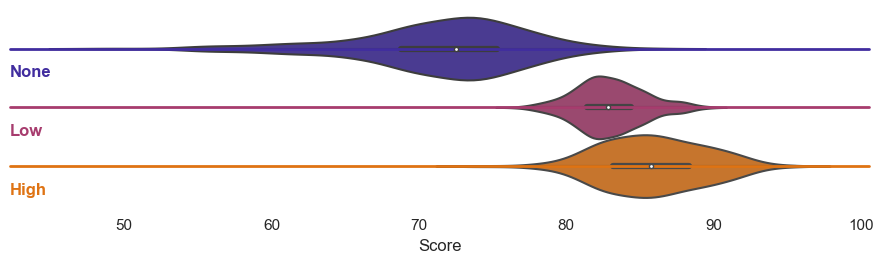

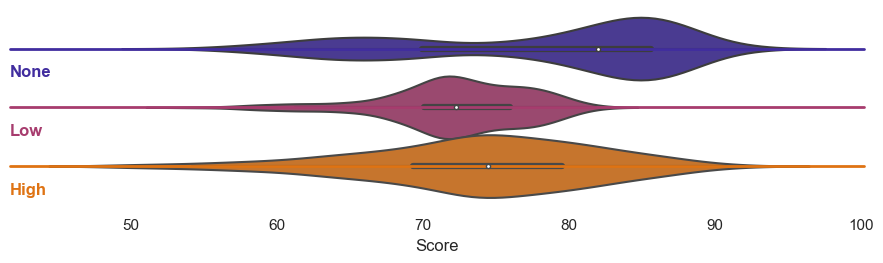

In [120]:
list_of_dfs = [results_df.loc[(results_df['Model']=='GPT4') & (results_df['Control']=='Control')],
               results_df.loc[(results_df['Model']=='GPT4') & (results_df['Control']=='Original instructions')]]
for df in list_of_dfs:
      # Initialize the FacetGrid object
      pal = sns.color_palette('CMRmap',n_colors=4, desat=.9)
      g = sns.FacetGrid(df, row="Temperature", hue="Temperature", aspect=9, height=1, palette=pal)

      # Draw the densities in a few steps
      g.map(sns.violinplot, "Score"),
            #bw_adjust=1, clip_on=False,
            #fill=True, alpha=1, linewidth=1.5)
      #g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


      # Define and use a simple function to label the plot in axes coordinates
      def label(x, color, label):
            ax = plt.gca()
            ax.text(0, .2, label, fontweight="bold", color=color,
                        ha="left", va="center", transform=ax.transAxes)


      g.map(label, "Score")

      # Set the subplots to overlap
      g.figure.subplots_adjust(hspace=-.25)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(yticks=[], ylabel="")
      g.despine(bottom=True, left=True)

In [117]:
results_df.loc[(results_df['Model']=='GPT4') & (results_df['Control']=='Original instructions')]

,Temperature,Strategy,Score,Model,Control
